In [13]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [10]:
def get_dataset():

    n_g1 = 100
    g1 = np.random.randn(n_g1, 2) + np.array([-2, -2])
    g1_2 = np.random.randn(n_g1, 2) + np.array([2, 2])

    n_g2 = 100
    g2 = np.random.randn(n_g2, 2) + np.array([-2, 2])
    g2_2 = np.random.randn(n_g2, 2) + np.array([2, -2])

    datas = np.vstack([g1, g1_2, g2, g2_2])
    targets = np.concatenate(
        (
            np.zeros(n_g1*2),
            np.ones(n_g2*2)
        )
    )
    targets = targets.reshape(-1, 1)
    return datas, targets

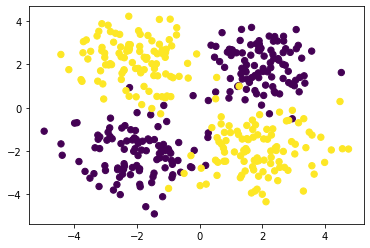

In [11]:
features, targets = get_dataset()
plt.scatter(features[:, 0], features[:,1], s=40, c=targets)
plt.show()

In [14]:
lr = 0.1

tf_features = tf.placeholder(tf.float32, shape=[None,2])
tf_targets = tf.placeholder(tf.float32, shape=[None,1])

# 1st layer
w1 = tf.Variable(tf.random.normal([2,3]))
b1 = tf.Variable(tf.zeros([3]))
# operations
z1 = tf.matmul(tf_features, w1) + b1
a1 = tf.nn.sigmoid(z1)

# out layer
w2 = tf.Variable(tf.random.normal([3,1]))
b2 = tf.Variable(tf.zeros([1]))
# operations
z2 = tf.matmul(a1, w2) + b2
p = tf.nn.sigmoid(z2)

cost = tf.reduce_mean(tf.square(p - tf_targets))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
train = optimizer.minimize(cost)

pred_is_correct = tf.equal(tf.round(p), tf_targets)
accuracy = tf.reduce_mean(tf.cast(pred_is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
for epoch in range(10000):
    
        sess.run(train, feed_dict={
            tf_features: features,
            tf_targets: targets
        })

        print("accuracy:", sess.run(accuracy, feed_dict={
            tf_features: features,
            tf_targets: targets
        }))


acy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
accuracy: 0.8875
ac

In [16]:

print("w:", sess.run(w))
print("b:", sess.run(b))

print("p:", sess.run(p, feed_dict={
    tf_features: [features[0]]
}))
print("true val:", targets[0])

print("accuracy:", sess.run(accuracy, feed_dict={
    tf_features: [features[0]],
    tf_targets: [targets[0]]
}))

print("cost:", sess.run(cost, feed_dict={
    tf_features: [features[0]],
    tf_targets: [targets[0]]
}))

NameError: name 'w' is not defined